## Problem Statement

BoomBikes, a US bike-sharing provider, aims to boost revenue post-pandemic by understanding the factors influencing shared bike demand in the American market. They have collected a dataset on daily bike demands and seek to identify significant variables that predict demand and describe demand patterns. This analysis will enable them to stand out from competitors, cater to customer needs effectively, and maximize profits once the pandemic situation improves.

# Importing and Understanding Data

In [90]:
#Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [91]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
BS=pd.read_csv('day.csv')# Read Data Set

In [93]:
BS.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [94]:
BS.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [95]:
BS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [96]:
BS.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##No Null Values in the data
    

## Data Preparation

In [97]:
# Changing Season, weathersit, Month and Weekday to catogorical

season_mapping={1:'spring', 2:'summer', 3:'fall', 4:'winter'}
BS['season']=BS['season'].map(season_mapping)

weather_mapping = { 1: 'Clear',2: 'Misty',3: 'Wintry',4: 'Stormy'}
BS['weathersit']=BS['weathersit'].map(weather_mapping)

Month_mapping = { 1: 'Jan',2: 'Feb',3: 'Mar',4: 'Apr',5:'May',6:'Jun',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
BS['mnth']=BS['mnth'].map(Month_mapping)

weekday_mapping={ 1: 'Sun',2: 'Mon',3: 'Tue',4: 'Wed',5:'Thu',6:'Fri',7:'Sat'}
BS['weekday']=BS['weekday'].map(weekday_mapping)

In [98]:
BS.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Sun,1,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Mon,1,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Tue,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Wed,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Thu,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [99]:
# Lets create new data frame and drop not relavant columns for analysis

bs1=BS
bs1.shape

(730, 16)

In [100]:
bs1=bs1.drop(['instant','dteday','casual','registered'],axis=1)

## VISUALIZING THE DATA

Visualising Numeric Variables
Let's make a pairplot of all the numeric variables

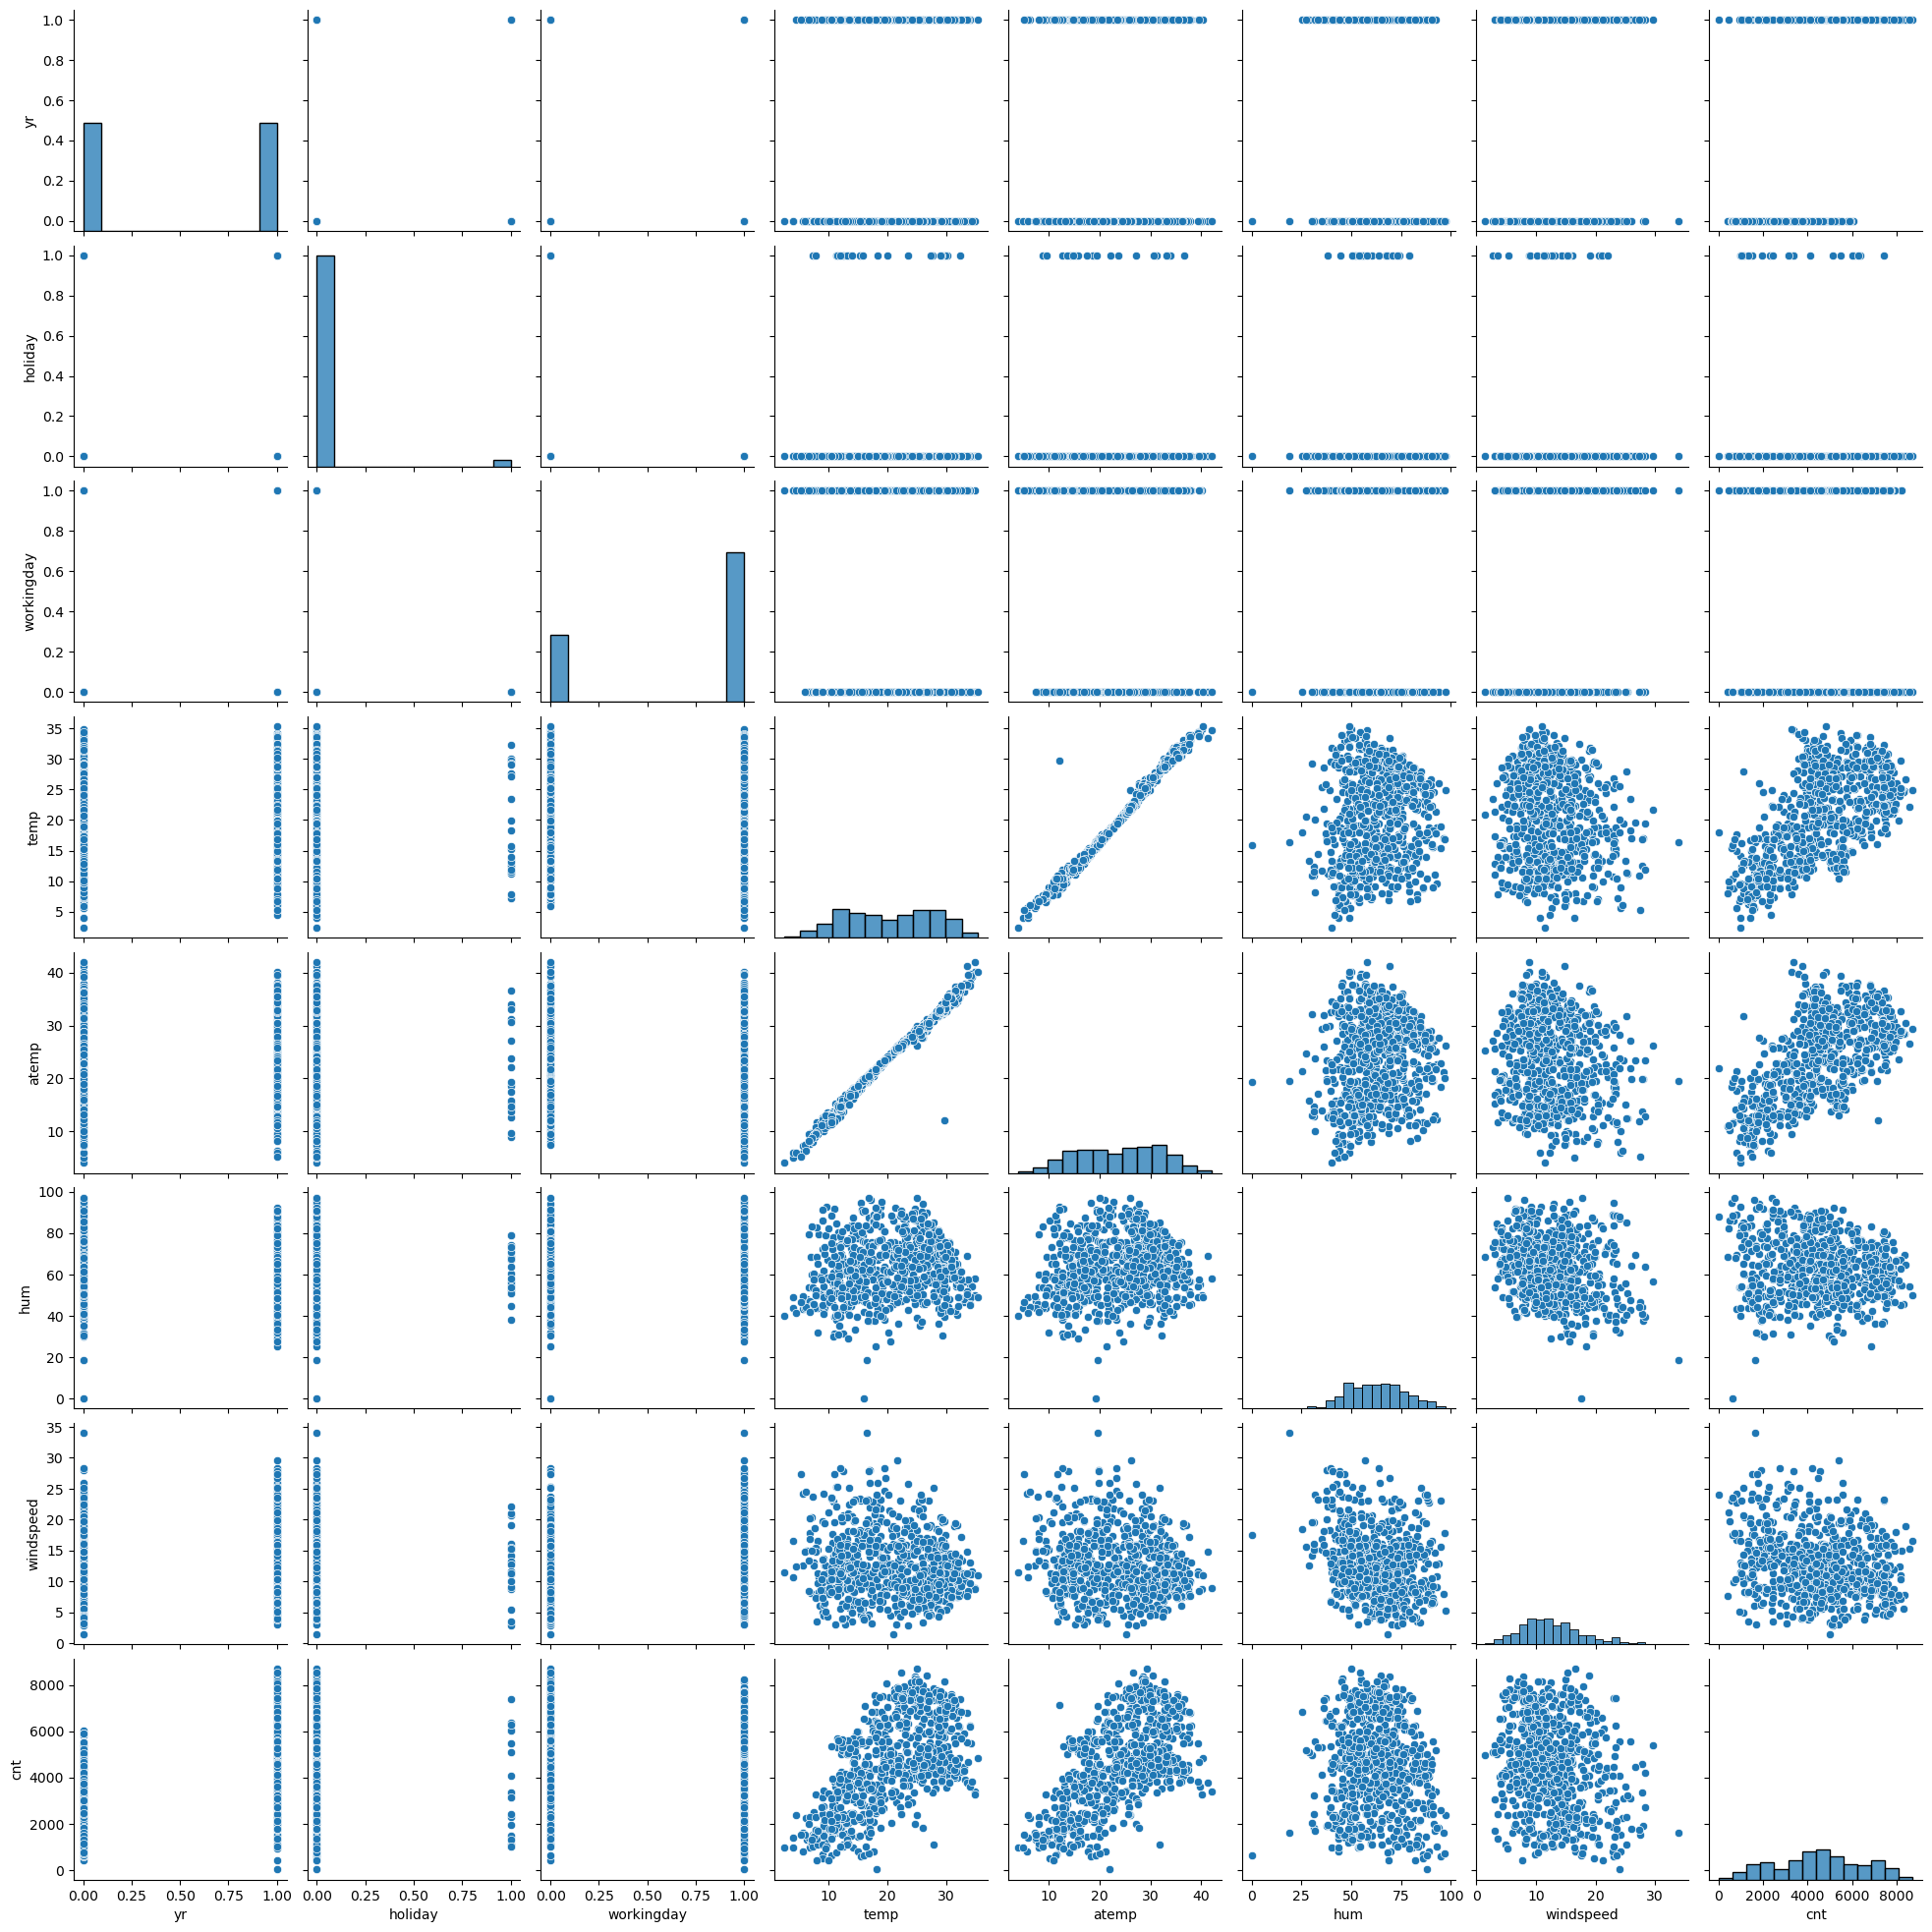

In [101]:
sns.pairplot(BS[['yr','holiday','workingday','temp','atemp','hum','windspeed','cnt']])
plt.show()

#High Coreleated predicted variables

#temp and atemp

In [102]:
# Plotting the Categorical Features

<Axes: xlabel='yr', ylabel='cnt'>

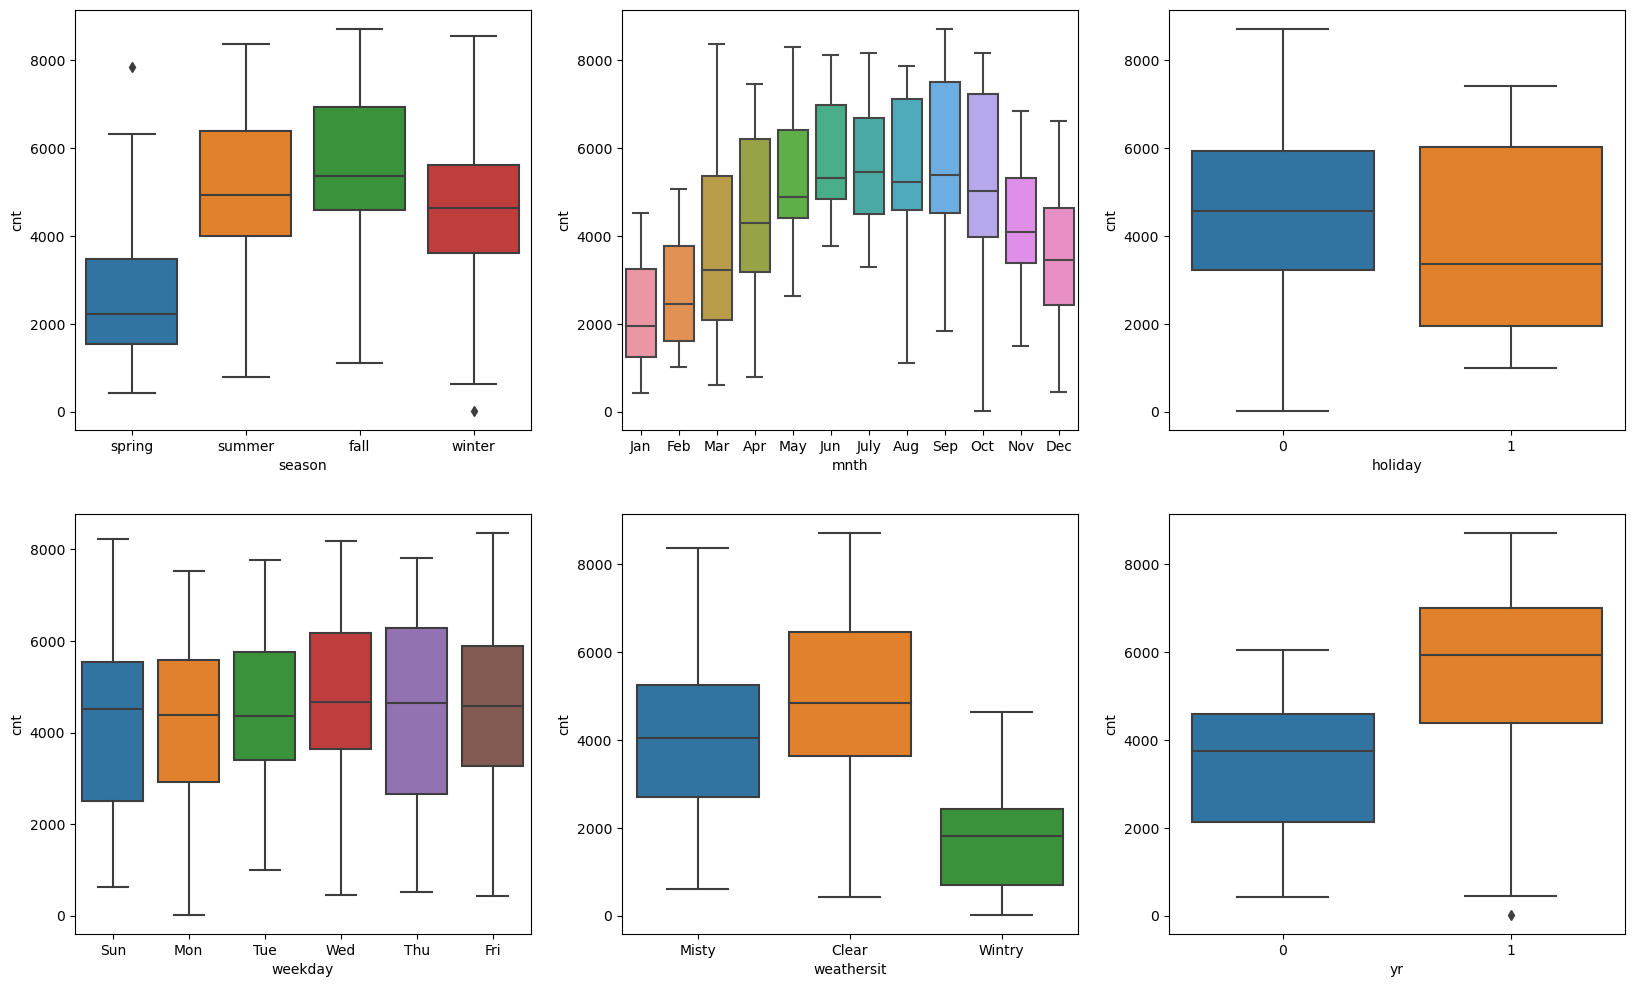

In [103]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data =bs1)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data =bs1)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data =bs1)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data =bs1)
plt.subplot(2,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data =bs1)
plt.subplot(2,3,6)
sns.boxplot(x = 'yr', y = 'cnt', data =bs1)


<Axes: xlabel='mnth', ylabel='cnt'>

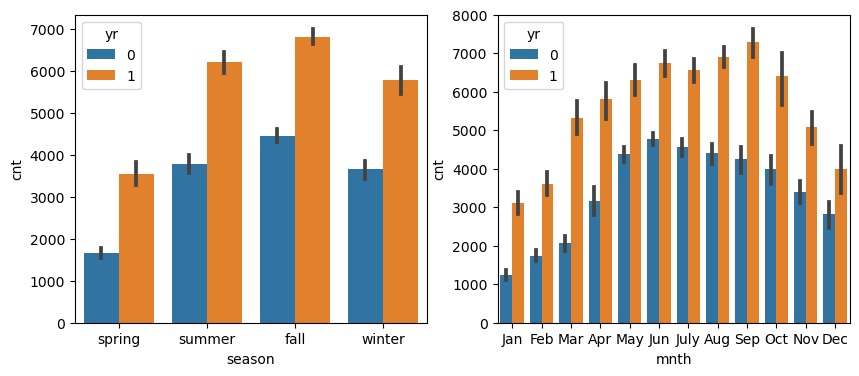

In [104]:
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
sns.barplot(x=bs1.season,y=bs1.cnt,data=bs1,hue='yr')
plt.subplot(1,2,2)
sns.barplot(x=bs1.mnth,y=bs1.cnt,data=bs1,hue='yr')



<Axes: xlabel='weekday', ylabel='cnt'>

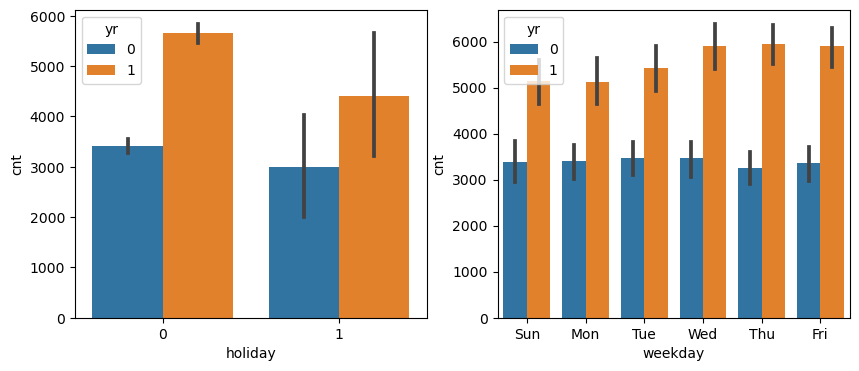

In [105]:
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
sns.barplot(x=bs1.holiday,y=bs1.cnt,data=bs1,hue='yr')
plt.subplot(1,2,2)
sns.barplot(x=bs1.weekday,y=bs1.cnt,data=bs1,hue='yr')

<Axes: xlabel='weathersit', ylabel='cnt'>

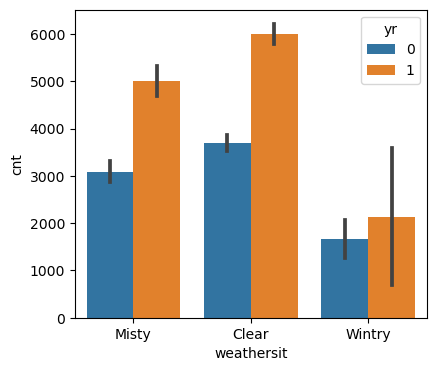

In [106]:
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
sns.barplot(x=bs1.weathersit,y=bs1.cnt,data=bs1,hue='yr')

# Encoding the categorical variables

In [107]:
bs1_season = pd.get_dummies(bs1['season'], drop_first = True)
bs1_mnth = pd.get_dummies(bs1['mnth'], drop_first = True)
bs1_weekday = pd.get_dummies(bs1['weekday'], drop_first = True)
bs1_weathersit = pd.get_dummies(bs1['weathersit'], drop_first = True)



In [108]:
bs2=pd.concat([bs1,bs1_season,bs1_mnth,bs1_weekday,bs1_weathersit],axis=1)

In [109]:
bs2.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Nov,Oct,Sep,Mon,Sun,Thu,Tue,Wed,Misty,Wintry
0,spring,0,Jan,0,Sun,1,Misty,14.110847,18.18125,80.5833,...,0,0,0,0,1,0,0,0,1,0
1,spring,0,Jan,0,Mon,1,Misty,14.902598,17.68695,69.6087,...,0,0,0,1,0,0,0,0,1,0
2,spring,0,Jan,0,Tue,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,1,0,0,0
3,spring,0,Jan,0,Wed,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,1,0,0
4,spring,0,Jan,0,Thu,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,1,0,0,0,0


In [110]:
bs2.drop(['season','mnth','weekday','weathersit'],axis=1,inplace=True)

In [111]:
bs2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   spring      730 non-null    uint8  
 9   summer      730 non-null    uint8  
 10  winter      730 non-null    uint8  
 11  Aug         730 non-null    uint8  
 12  Dec         730 non-null    uint8  
 13  Feb         730 non-null    uint8  
 14  Jan         730 non-null    uint8  
 15  July        730 non-null    uint8  
 16  Jun         730 non-null    uint8  
 17  Mar         730 non-null    uint8  
 18  May         730 non-null    uint8  
 19  Nov         730 non-null    u

## Splitting the Data into Training and Testing Sets
As you know, the first basic step for regression is performing a train-test split.

In [112]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bs2, train_size = 0.7, test_size = 0.3, random_state = 100)

In [113]:
df_train.shape

(510, 29)

In [114]:
df_test.shape

(219, 29)

##Rescaling the Features

In [115]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [116]:
# Apply scaler() to below columns 
num_vars = ['temp','atemp','hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [117]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Nov,Oct,Sep,Mon,Sun,Thu,Tue,Wed,Misty,Wintry
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,1,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,0,0,0,1,0


In [118]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Nov,Oct,Sep,Mon,Sun,Thu,Tue,Wed,Misty,Wintry
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.086275,0.080392,0.152941,0.154902,0.147059,0.135294,0.143137,0.343137,0.029412
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.281045,0.272166,0.360284,0.362166,0.354512,0.342373,0.350557,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


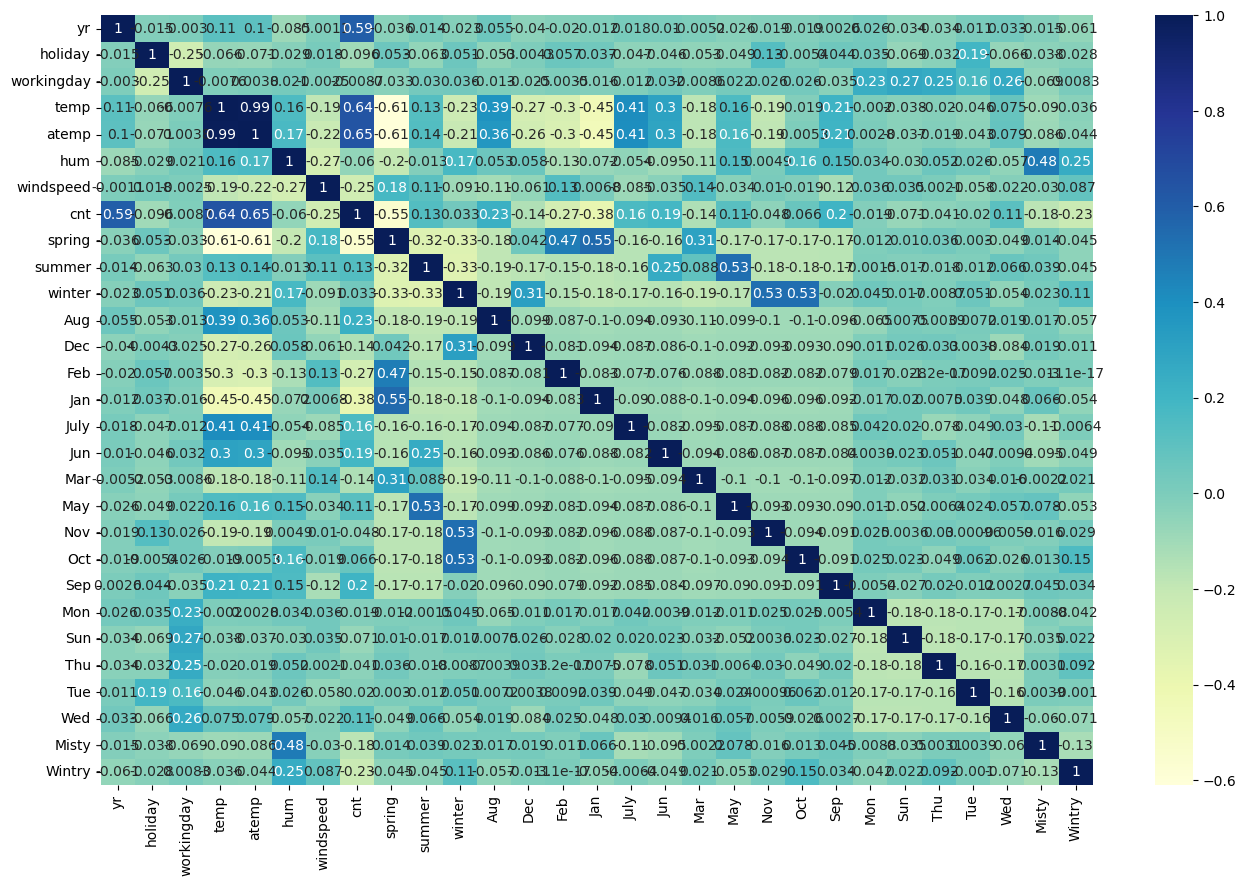

In [119]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [120]:
y_train = df_train.pop('cnt')
X_train = df_train

In [121]:
X_train.head(1)

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,Nov,Oct,Sep,Mon,Sun,Thu,Tue,Wed,Misty,Wintry
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,0,1,0,0,0,0,1,0,0,0


# #Building a linear mode

Fit a regression line through the training data using statsmodels. Remember that in statsmodels, you need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.

##############  First Model With All Indepndendt varialbel####################

In [122]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [123]:
# Check the parameters obtained

lr.params

const         0.341809
yr            0.231014
holiday      -0.135079
workingday   -0.060795
temp          0.396226
atemp         0.050162
hum          -0.157838
windspeed    -0.180696
spring       -0.044555
summer        0.041462
winter        0.110393
Aug           0.022994
Dec          -0.045587
Feb          -0.036890
Jan          -0.063368
July         -0.033722
Jun           0.002379
Mar           0.000975
May           0.024841
Nov          -0.041928
Oct           0.005829
Sep           0.086668
Mon           0.026771
Sun           0.028468
Thu           0.053162
Tue           0.041893
Wed           0.056975
Misty        -0.059215
Wintry       -0.251291
dtype: float64

In [124]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     98.03
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          4.41e-179
Time:                        21:18:47   Log-Likelihood:                 523.79
No. Observations:                 510   AIC:                            -989.6
Df Residuals:                     481   BIC:                            -866.8
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3418      0.044      7.758      0.0

In [125]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [126]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif 

,Features,VIF
0,yr,2.14
1,holiday,6.97
2,workingday,229.47
3,temp,433.69
4,atemp,380.70
5,hum,38.12
6,windspeed,5.38
7,spring,11.75
8,summer,6.79
9,winter,11.79


In [127]:
# Lets Use RFE and to decide on which are insignificant variable

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [128]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)        
rfe = rfe.fit(X_train, y_train)

In [129]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 11),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', True, 1),
 ('Jun', False, 13),
 ('Mar', False, 14),
 ('May', False, 10),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', False, 9),
 ('Sun', False, 8),
 ('Thu', False, 6),
 ('Tue', False, 7),
 ('Wed', False, 5),
 ('Misty', True, 1),
 ('Wintry', True, 1)]

In [130]:
col = X_train.columns[rfe.support_]
col# Columns Selected using RFE

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Dec', 'Jan', 'July', 'Nov', 'Sep', 'Misty', 'Wintry'],
      dtype='object')

In [131]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'Aug', 'Feb', 'Jun', 'Mar', 'May', 'Oct', 'Mon',
       'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

# Here onwards ,we have to eliminate insignificant variables one by one after evaluating
P- Value and VIF.Till we are getting Very less P value ie value so close to Zero and VIF less than 5.



In [132]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [133]:

# Function to claculated VIF
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [134]:
calculateVIF(X_train_rfe)

,Features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.81
13,Misty,2.32
0,yr,2.09
11,Nov,1.83
9,Jan,1.75


### Second Model

In [135]:
#######################Building Second Model#####################################

In [136]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [137]:
lm1 = sm.OLS(y_train,X_train_rfe1).fit()   # Running the linear model

In [138]:
#Let's see the summary of our linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          3.34e-189
Time:                        21:18:47   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3202      0.036      8.886      0.0

In [139]:
# Dec have high P value 
# As suggested independent variable with high P value should be discared first before discarding variable with High VIF

### Third Model

In [140]:
X_train_new = X_train_rfe.drop(['Dec'], axis = 1)

In [141]:
calculateVIF(X_train_new)

,Features,VIF
3,hum,29.12
2,temp,16.80
4,windspeed,4.71
5,spring,4.37
7,winter,3.78
6,summer,2.79
12,Misty,2.29
0,yr,2.09
8,Jan,1.67
9,July,1.59


In [142]:


import statsmodels.api as sm  
X_train_rfe2 = sm.add_constant(X_train_new)
lm2 = sm.OLS(y_train,X_train_rfe2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.4
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          2.25e-189
Time:                        21:18:47   Log-Likelihood:                 512.39
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     495   BIC:                            -931.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3030      0.035      8.597      0.0

### Fourth Model

In [143]:
X_train_new = X_train_new.drop(['hum'], axis = 1)

In [144]:
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.15
3,windspeed,4.67
4,spring,2.76
6,winter,2.29
5,summer,2.23
0,yr,2.07
7,Jan,1.61
8,July,1.59
9,Nov,1.59
11,Misty,1.56


In [145]:
import statsmodels.api as sm  
X_train_rfe3 = sm.add_constant(X_train_new)
lm3 = sm.OLS(y_train,X_train_rfe3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.1
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          2.54e-186
Time:                        21:18:48   Log-Likelihood:                 502.35
No. Observations:                 510   AIC:                            -976.7
Df Residuals:                     496   BIC:                            -917.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2214      0.031      7.216      0.0

### FIfth Model

In [146]:
X_train_new = X_train_new.drop(['Nov'], axis = 1)

In [147]:
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.13
3,windspeed,4.61
4,spring,2.75
5,summer,2.22
0,yr,2.07
6,winter,1.79
7,Jan,1.61
8,July,1.59
10,Misty,1.56
9,Sep,1.34


In [148]:
import statsmodels.api as sm  
X_train_rfe4 = sm.add_constant(X_train_new)
lm4 = sm.OLS(y_train,X_train_rfe4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     213.1
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          3.97e-187
Time:                        21:18:48   Log-Likelihood:                 501.48
No. Observations:                 510   AIC:                            -977.0
Df Residuals:                     497   BIC:                            -921.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2155      0.030      7.096      0.0

### Sixth Model

In [149]:
X_train_new = X_train_new.drop(['Jan'], axis = 1)

In [150]:
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.09
3,windspeed,4.60
5,summer,2.21
4,spring,2.08
0,yr,2.07
6,winter,1.79
7,July,1.58
9,Misty,1.55
8,Sep,1.34
10,Wintry,1.08


In [151]:
import statsmodels.api as sm  
X_train_rfe5 = sm.add_constant(X_train_new)
lm5 = sm.OLS(y_train,X_train_rfe5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          2.40e-187
Time:                        21:18:48   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1996      0.030      6.758      0.0

### Seventh Model

In [152]:
X_train_new = X_train_new.drop(['July'], axis = 1)

In [153]:
calculateVIF(X_train_new)

,Features,VIF
3,windspeed,4.59
2,temp,3.84
0,yr,2.07
4,spring,1.99
5,summer,1.89
6,winter,1.63
8,Misty,1.54
7,Sep,1.23
9,Wintry,1.08
1,holiday,1.04


In [154]:
import statsmodels.api as sm  
X_train_rfe6 = sm.add_constant(X_train_new)
lm6 = sm.OLS(y_train,X_train_rfe6).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.2
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          7.36e-187
Time:                        21:18:48   Log-Likelihood:                 495.16
No. Observations:                 510   AIC:                            -968.3
Df Residuals:                     499   BIC:                            -921.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1910      0.030      6.456      0.0

# We can consider above model

In [155]:
# Checking the parameters and their coefficient values
lm6.params

const        0.190994
yr           0.234060
holiday     -0.096865
temp         0.478177
windspeed   -0.148155
spring      -0.055092
summer       0.060987
winter       0.095929
Sep          0.090932
Misty       -0.080124
Wintry      -0.286002
dtype: float64

## Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [156]:
y_train_pred = lm6.predict(X_train_rfe6)

In [157]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Normality of Error Terms

Text(0.5, 0, 'Errors')

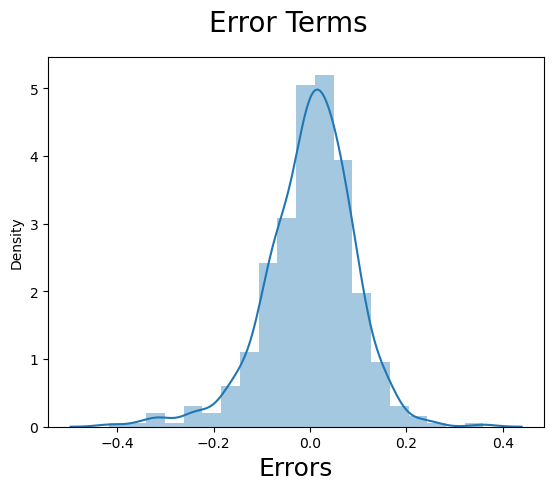

In [158]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Error terms are following normal distribution

## ##Multi Colinearity check

In [159]:
calculateVIF(X_train_new)# VIF

,Features,VIF
3,windspeed,4.59
2,temp,3.84
0,yr,2.07
4,spring,1.99
5,summer,1.89
6,winter,1.63
8,Misty,1.54
7,Sep,1.23
9,Wintry,1.08
1,holiday,1.04


VIF values are less than 5 which is good and which indicates No major multicolineariry

## Plotting the residual to check independence

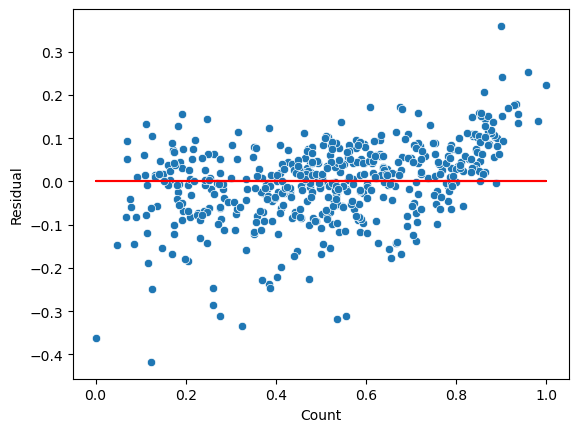

In [160]:

residual =y_train - y_train_pred
sns.scatterplot(x=y_train,y=residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

NO presence of a funnel shape or a distinct pattern.A uniform distribution of residuals, indicating homoscedasticity.  

## R2 and MSE

In [161]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_train, y_train_pred)
r_squared = r2_score(y_train, y_train_pred)

In [162]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.008398703877205404
r_square_value : 0.833170119099662


## Making Predictions Using the Final Model

In [163]:
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Nov,Oct,Sep,Mon,Sun,Thu,Tue,Wed,Misty,Wintry
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,1,0,0,0,0,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,1,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,0,0,0,0,0


In [164]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Nov,Oct,Sep,Mon,Sun,Thu,Tue,Wed,Misty,Wintry
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.073059,0.082192,0.086758,0.123288,0.118721,0.132420,0.155251,0.141553,0.319635,0.027397
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.260830,0.275286,0.282125,0.329520,0.324202,0.339723,0.362974,0.349389,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [165]:
#Dividing into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [166]:
X_test

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,Nov,Oct,Sep,Mon,Sun,Thu,Tue,Wed,Misty,Wintry
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,0,...,0,0,0,0,0,0,1,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0,0,1,...,0,1,0,0,0,0,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,0,...,0,0,0,0,0,1,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,0,1,0.257562,0.243430,0.708888,0.287411,1,0,0,...,0,0,0,1,0,0,0,0,1,0
702,1,0,1,0.519232,0.511907,0.756118,0.283397,0,0,1,...,0,0,0,0,0,0,1,0,0,0
127,0,0,1,0.584649,0.577380,0.650923,0.069510,0,1,0,...,0,0,0,1,0,0,0,0,0,0
640,1,0,1,0.745598,0.682653,0.817947,0.052115,0,0,1,...,0,1,0,0,0,0,0,1,1,0


In [167]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new1 = X_test[X_train_new.columns]

# Adding a constant variable 
#X_test_new = sm.add_constant(X_test_new)

In [168]:
X_test_new1
X_test_new2=sm.add_constant(X_test_new1)

In [169]:
X_test_new2

,const,yr,holiday,temp,windspeed,spring,summer,winter,Sep,Misty,Wintry
184,1.0,0,1,0.831783,0.084219,0,0,0,0,1,0
535,1.0,1,0,0.901354,0.153728,0,1,0,0,0,0
299,1.0,0,0,0.511964,0.334206,0,0,1,0,1,0
221,1.0,0,0,0.881625,0.339570,0,0,0,0,0,0
152,1.0,0,0,0.817246,0.537414,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
400,1.0,1,0,0.257562,0.287411,1,0,0,0,1,0
702,1.0,1,0,0.519232,0.283397,0,0,1,0,0,0
127,1.0,0,0,0.584649,0.069510,0,1,0,0,0,0
640,1.0,1,0,0.745598,0.052115,0,0,1,0,1,0


In [170]:
X_train_new.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'spring', 'summer', 'winter',
       'Sep', 'Misty', 'Wintry'],
      dtype='object')

In [171]:
# Making predictions
y_pred = lm6.predict(X_test_new2)

In [172]:
y_pred

184    0.399268
535    0.894272
299    0.402094
221    0.562258
152    0.563149
         ...   
400    0.370417
702    0.727280
127    0.521248
640    0.789665
72     0.264308
Length: 219, dtype: float64

# #Model Evaluation
 plot the graph for actual versus predicted value

Text(0, 0.5, 'y_pred')

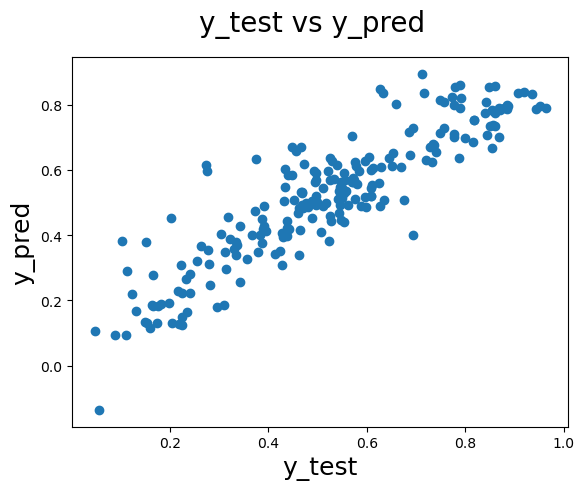

In [173]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=18)                          # Y-label

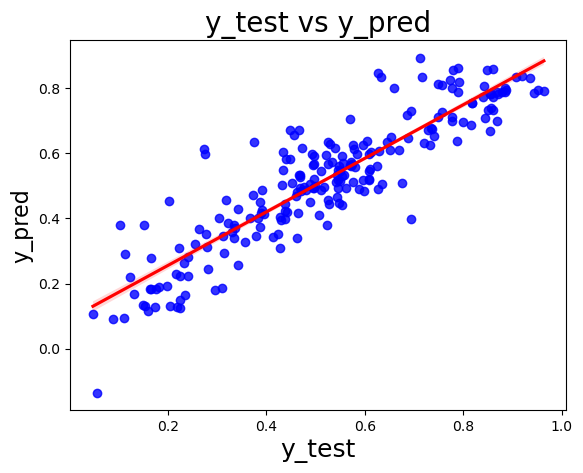

In [174]:
plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

Outcome has Linear relation ship

Text(0, 0.5, 'Views')

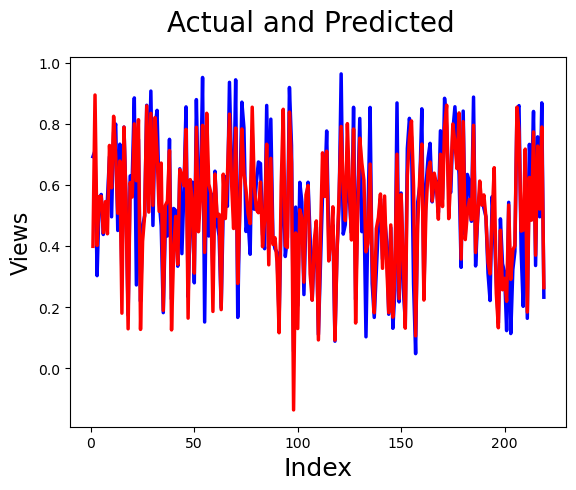

In [175]:
#Actual vs Predicted
c = [i for i in range(1,220,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)                               # Y-label

In [176]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8035441330582012

## Comparision between Training and Testing dataset:

- Train dataset R^2          : 0.833
- Test dataset R^2           : 0.803

# Conclusion

The demand for bikes in the American market is influenced by various factors, including:
Holidays
Temperature
Windspeed
Seasonal variations such as spring, summer, and winter
Specific months like September.
Weather conditions like misty days and wintry periods


Understanding and analyzing these variables is crucial for bike-sharing providers like BoomBikes.


Incorporating these factors into business strategies can help optimize services and tailor offerings to customer preferences.
By leveraging these insights, companies can enhance customer satisfaction, maximize revenue, and stay competitive in the bike-sharing industry.